# Machine Learning Project

Kathia Zamora Arias <kattia.zamora@prodigious.com><br />
Alejandro Madrigal Leival <me@alemadlei.tech>

In [1]:
# All dependencies go here
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

In [2]:
# Description
# LIMIT_BAL: Credit in Taiwan dollars.
# SEX: 
#   1 => Male
#   2 => Female
# EDUCATION: 
#   1 => Graduate School
#   2 => University
#   3 => High School
#   4 => Others
# MARRIAGE:
#   1 => Married
#   2 => Single
#   3 => Other
# AGE: Age
# PAY_0: Payment status for September 2005
# PAY_2: Payment status for August 2005
# PAY_3: Payment status for July 2005
# PAY_4: Payment status for June 2005
# PAY_5: Payment status for May 2005
# PAY_6: Payment status for April 2005
# - All of these have the following possible values
#   -1 => Pay duly
#    1 => One month payment delay
#    2 => Two months payment delay
#    . => . months payment delay
#    9 => Nine months or month payment delay.
# BILL_AMT1: Bill statement amount for September 2005.
# BILL_AMT2: Bill statement amount for August 2005.
# BILL_AMT3: Bill statement amount for July 2005.
# BILL_AMT4: Bill statement amount for June 2005.
# BILL_AMT5: Bill statement amount for May 2005.
# BILL_AMT6: Bill statement amount for April 2005.
# - All of these values are in Taiwan dollars.
# PAY_AMT1: Amount of previous payment for September 2005.
# PAY_AMT2: Amount of previous payment for August 2005.
# PAY_AMT3: Amount of previous payment for July 2005.
# PAY_AMT4: Amount of previous payment for June 2005.
# PAY_AMT5: Amount of previous payment for May 2005.
# PAY_AMT6: Amount of previous payment for April 2005.
# default payment next month: Indicates if the next month (October 2005) will be a default payment month.

# Loads and cleans up our dataset (first row in this case is the second one).
data = pd.read_csv('default_credit.csv', header=1);
data = data.astype('int32')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Descriptive Statistics (use charts, graphics and tables as needed) 

### 1 - Display graphics about payments made between sept 2005 and April 2005. Display and explain any important finding. (5 pts)

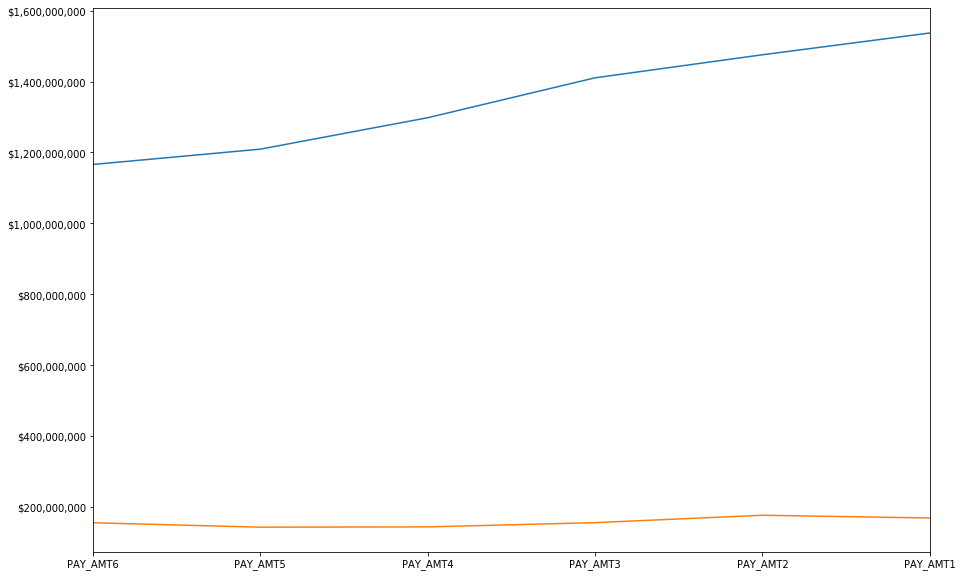

In [3]:
# General comparison between the billing statement and the payment in general.
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
data[['BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 'BILL_AMT3', 'BILL_AMT2', 'BILL_AMT1']].sum().plot(figsize=(15, 10))
data[['PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT1']].sum().plot(figsize=(15, 10))
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.show()

#### It seems that the total amount that has been billed to people has increased, but not so much how people pay, which could mean that people are in debt for a longer term that what can be seen here in general.

(24.0, 0.0)

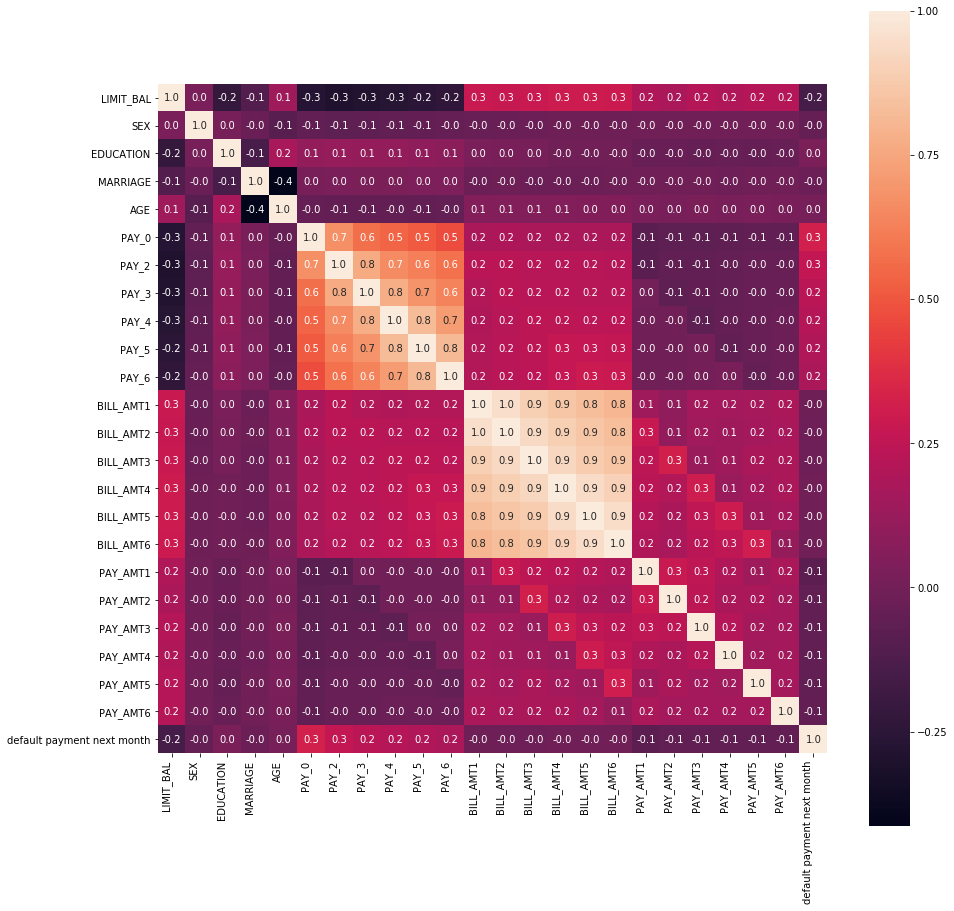

In [4]:
import seaborn as sns
corr = data.drop(['ID'], axis=1).corr()
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(
    corr, 
    annot=True,
    square=True,
    ax=ax,
    fmt=".1f"
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update t

#### Using a heatmap we can sort of identify what data is correlated. For instance:
#### * The limit balance seems to be correlated with the amoun in the billing statements and the payment amount each month. 
#### * Payment status seems related to the whether someone defaults payment the next month, in particular the last 2 months. But also, payment status is related to billing statement for the last 2 months. 
#### * Billing statement seems to be related to payment amount.
#### * We can tell that good predictors for wheter someone defaults payment seem to be related to the payment status from previous months and the limit balance.

(16.0, 0.0)

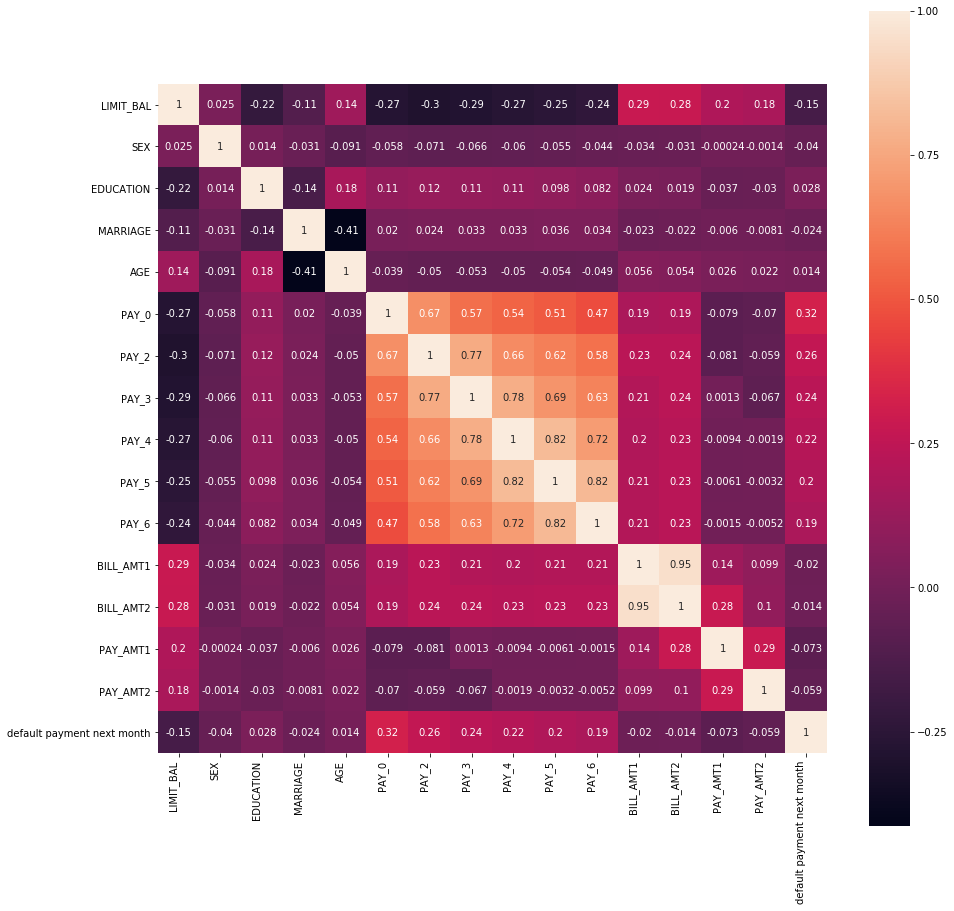

In [5]:
import seaborn as sns
corr = data
for index in ['ID', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']:
    corr = corr.drop(index, axis=1)
    
corr = corr.corr()
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(
    corr, 
    annot=True,
    square=True,
    ax=ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update t

#### Clearing the amount of data from the dataset:
#### * It still seems that a clear indicator of wheter someone defaults is related to payment status over the last few months.
#### * Billing statement from September seems to be somewhat related to default payment for next month.
#### * Sex does not seem to be entirely relevant, compared to education, marriage status and age, to define if someone defaults payment.

In [6]:
#Payment status by month: 

data['PAY_6'].value_counts().sort_index()
#there are unknown variables: -2 and 0

-2     4895
-1     5740
 0    16286
 2     2766
 3      184
 4       49
 5       13
 6       19
 7       46
 8        2
Name: PAY_6, dtype: int64

#### Data might need some cleanup, as there are values that fall outside the problem description.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CE2A929908>,
      dtype=object)

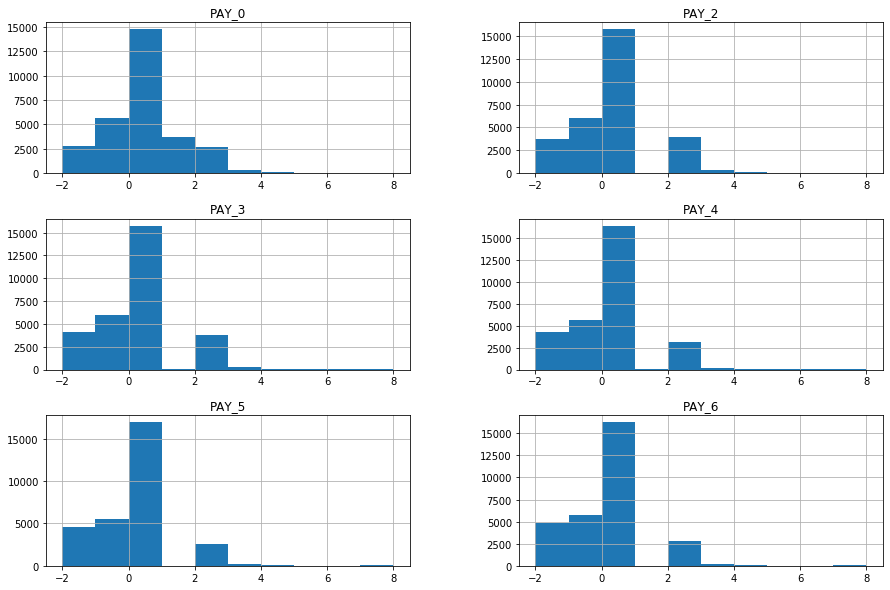

In [7]:
data[['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2','PAY_0']].hist(figsize=(15, 10))

#### The previous charts give us a general idea of the status throughout time.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CE2B240588>,
      dtype=object)

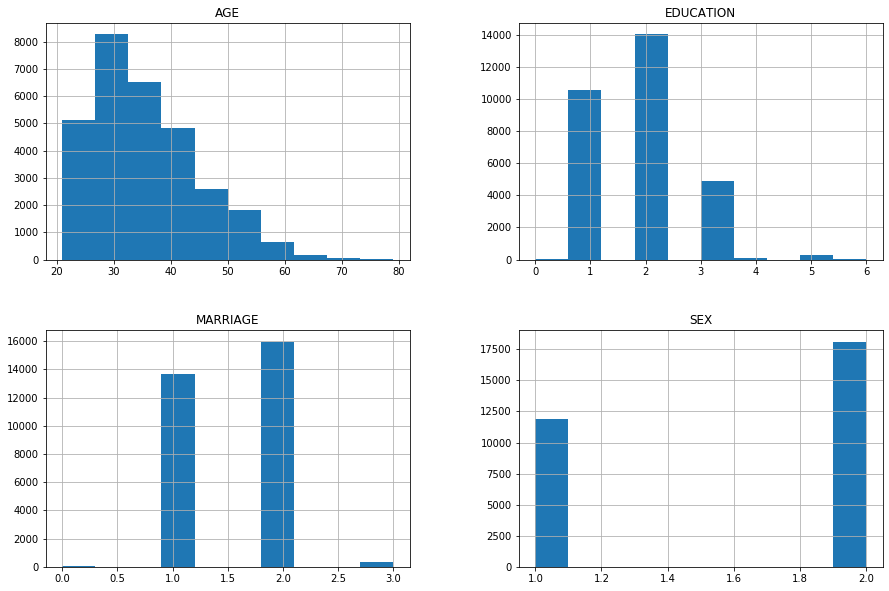

In [8]:
data[['SEX','EDUCATION','MARRIAGE','AGE']].hist(figsize=(15, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CE2A852FC8>]],
      dtype=object)

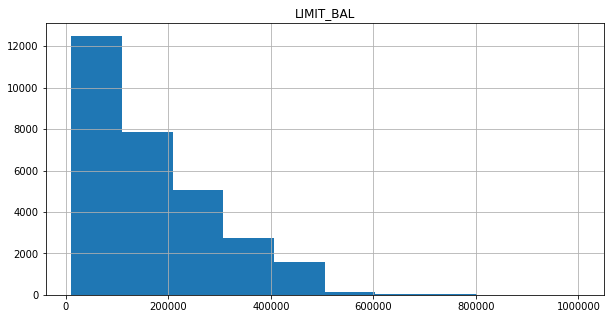

In [9]:
data[['LIMIT_BAL']].hist(figsize=(10, 5))

### 2 - What is the average amount we lend our customers? (use a box plot) (5 pts)

In [10]:
# This can be obtained multiple ways. We just describe the data to see all things that might be relevant.
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


#### From the initial dataset describe we observe that the mean amount is NT$ 167484.322667

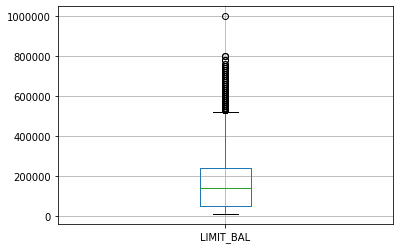

In [11]:
# However, plotting the data using boxplot we get the following.
data[['LIMIT_BAL']].boxplot()

In [12]:
# Which basically tells us that there are some noticeable outliers above a specific value.
# Just for evaluation purposes we define a separator value here. 
limitValue = 500000

# We separate this data into two groups. First the one that has 
underLimitValue = data.loc[data['LIMIT_BAL'] < limitValue][['LIMIT_BAL']]
underLimitValue.describe()

,LIMIT_BAL
count,29072.00000
mean,156172.93891
std,114631.76685
min,10000.00000
25%,50000.00000
50%,130000.00000
75%,230000.00000
max,490000.00000


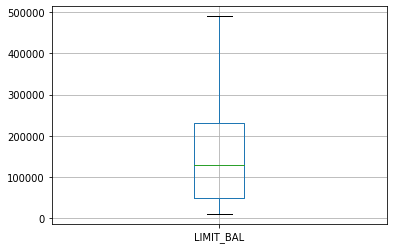

In [13]:
underLimitValue[['LIMIT_BAL']].boxplot()

In [14]:
overLimitValue = data.loc[data['LIMIT_BAL'] >= limitValue];
overLimitValue.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,...,928.000000,928.000000,928.000000,928.000000,9.280000e+02,928.000000,928.000000,928.000000,928.000000,928.000000
mean,15156.417026,521842.672414,1.548491,1.520474,1.445043,39.433190,-0.491379,-0.622845,-0.610991,-0.591595,...,95010.887931,88393.640086,86036.294181,15601.220905,2.178710e+04,18984.580819,15556.711207,18161.565733,20216.633621,0.112069
std,8801.019138,54590.255918,0.497911,0.748685,0.501559,8.270629,1.033386,0.969878,0.956761,0.915063,...,135590.065268,129068.002111,125170.454542,33423.121231,8.009591e+04,50498.871341,32979.835233,42125.101015,48450.435917,0.315621
min,7.000000,500000.000000,1.000000,1.000000,1.000000,23.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-4729.000000,-10505.000000,-39046.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7175.250000,500000.000000,1.000000,1.000000,1.000000,33.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,5402.250000,4565.750000,3404.250000,2011.250000,2.000000e+03,1566.500000,1150.000000,1456.500000,1584.000000,0.000000
50%,14464.500000,500000.000000,2.000000,1.000000,1.000000,38.000000,0.000000,0.000000,0.000000,0.000000,...,30814.000000,28905.000000,26753.500000,6500.500000,7.413000e+03,6443.500000,5482.000000,5303.500000,6073.500000,0.000000
75%,23332.750000,500000.000000,2.000000,2.000000,2.000000,45.000000,0.000000,0.000000,0.000000,0.000000,...,130190.000000,117332.500000,118563.000000,16655.500000,1.750375e+04,15889.750000,15000.000000,15033.750000,16684.000000,0.000000
max,29964.000000,1000000.000000,2.000000,6.000000,3.000000,73.000000,8.000000,7.000000,6.000000,5.000000,...,891586.000000,927171.000000,961664.000000,493358.000000,1.684259e+06,896040.000000,528897.000000,426529.000000,528666.000000,1.000000


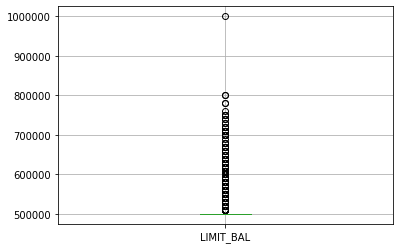

In [15]:
overLimitValue[['LIMIT_BAL']].boxplot()

### 3 - Which gender is more prone to default payment? (5 pts)

In [16]:
data['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [17]:
sex_id = data.groupby(['SEX','default payment next month']).agg({
    'ID':{
        'total_count':'count'
    }
})
sex_id

C:\Users\alejandro_2\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1455: FutureWarning: using a dict with renaming is deprecated and will be removed
in a future version.

For column-specific groupby renaming, use named aggregation

    >>> df.groupby(...).agg(name=('column', aggfunc))

  return super().aggregate(arg, *args, **kwargs)


ID
                               total_count
SEX default payment next month            
1   0                                 9015
    1                                 2873
2   0                                14349
    1                                 3763

In [18]:
sex_pcts = sex_id.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
sex_pcts

ID
                               total_count
SEX default payment next month            
1   0                            75.832773
    1                            24.167227
2   0                            79.223719
    1                            20.776281

#### Based on the final results, Males (SEX=1) are more prone to default payment. (24.16%)

### 4 - Are single men more prone to default payments than married men? (5 pts)

In [19]:
men_status = data[data['SEX']==1].groupby(['MARRIAGE','default payment next month']).agg({
    'ID':{
        'count':'count'
    }
})
men_status

ID
                                    count
MARRIAGE default payment next month      
0        0                             12
         1                              2
1        0                           3844
         1                           1346
2        0                           5068
         1                           1485
3        0                             91
         1                             40

In [20]:
#Percents by status
status_pcts = men_status.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
status_pcts

ID
                                         count
MARRIAGE default payment next month           
0        0                           85.714286
         1                           14.285714
1        0                           74.065511
         1                           25.934489
2        0                           77.338624
         1                           22.661376
3        0                           69.465649
         1                           30.534351

#### That is indeed correct, married men [SEX=1, MARRIAGE=1] are more prone to default payment compared to single men [SEX=1, MARRIAGE=2].
#### Married men 25.93%  Single men 22.66%

### 5 - Is Education important to determine if someone defaults payments? (5 pts)

#### Taking into consideration that:
1 => Graduate School
2 => University
3 => High School
4 => Others

In [21]:
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [22]:
edu_dp = data.groupby(['EDUCATION','default payment next month']).agg({
    'ID':{
        'count':'count'
    }
})
edu_dp

ID
                                      count
EDUCATION default payment next month       
0         0                              14
1         0                            8549
          1                            2036
2         0                           10700
          1                            3330
3         0                            3680
          1                            1237
4         0                             116
          1                               7
5         0                             262
          1                              18
6         0                              43
          1                               8

In [23]:
#Percents by education
edu_pcts = edu_dp.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
edu_pcts

ID
                                           count
EDUCATION default payment next month            
0         0                           100.000000
1         0                            80.765234
          1                            19.234766
2         0                            76.265146
          1                            23.734854
3         0                            74.842384
          1                            25.157616
4         0                            94.308943
          1                             5.691057
5         0                            93.571429
          1                             6.428571
6         0                            84.313725
          1                            15.686275

## Predictive Statistics - 50pts

In [24]:
# Importing all required libraries.
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from scipy.spatial.distance import cdist
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
import numpy as np
from time import time

### 1 - Can we cluster our customers into categories? (unlabeled clustering) - (10 pts)

In [25]:
# As our data is not labeled in any way that would allows us to classify the people, we will attempt to
# figure this out by using KMeans.

# We get the data use to infere the clusters.
y = data['default payment next month'];
X = data.drop(['default payment next month', 'ID'], axis=1)

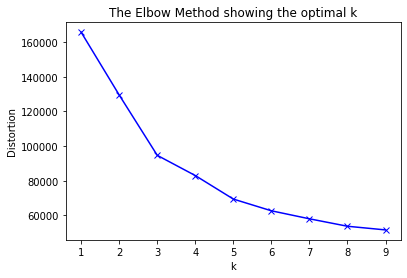

In [26]:
# Uses PCA to transform data.
pca = decomposition.PCA(n_components = 2)
pca.fit(X)
X = pca.transform(X)

# Gets the clusters groups to plot and figure out the best number of clusters to use.
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

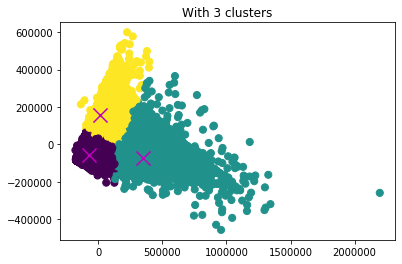

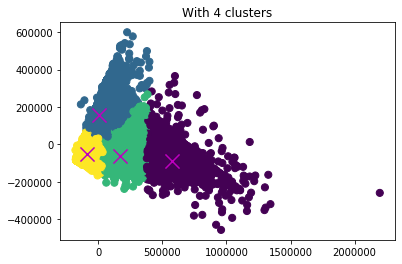

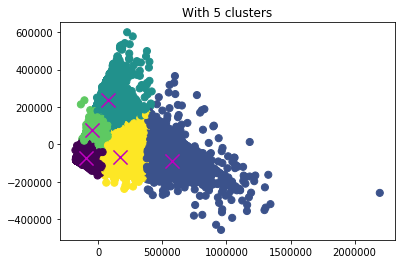

In [27]:
# Lets compare the groupings that could be used as elbows.
for i in range(3, 6):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    predict = kmeans.predict(X)
    centroids = kmeans.cluster_centers_
    
    plt.title('With ' + str(i) + ' clusters')
    plt.scatter(X[ : , 0], X[ : , 1], s=50, c=predict)
    plt.scatter(centroids[ : , 0], centroids[ : , 1], s = 200, marker='x', c = 'm')
    plt.show()

#### Based on the data, we feel that 5 clusters is something that resembles the data we have with a good accuracy.

### 2 - Can cluster categories serve to predict payment defaults? – (10 pts)

In [28]:
# Will iterate over cluster variations...
for i in range(3, 6):

    print ('Evaluation scores for', str(i), 'clusters.')
    kmeans_model_cross_val = KMeans(n_clusters=i)

    # Cross validates data 
    scores = cross_val_score(kmeans_model_cross_val, X, y, scoring='neg_mean_squared_error', cv=10)
    print('Cross-validated scores:', -scores)

    predictions = cross_val_predict(kmeans_model_cross_val, X, y, cv=10)
    accuracy = metrics.r2_score(y, predictions)
    print('Cross-Predicted Accuracy:', -accuracy)
    print('================================')

Evaluation scores for 3 clusters.
Cross-validated scores: [0.74733333 1.21633333 2.06933333 1.22166667 2.08766667 1.081
 0.82933333 0.861      0.949      0.832     ]
Cross-Predicted Accuracy: 7.4800715030279505
Evaluation scores for 4 clusters.
Cross-validated scores: [1.63033333 1.50566667 1.57733333 1.082      4.579      4.72033333
 4.819      1.30166667 1.70633333 2.671     ]
Cross-Predicted Accuracy: 13.07475930110558
Evaluation scores for 5 clusters.
Cross-validated scores: [4.10366667 7.531      4.435      4.416      5.28666667 2.67433333
 2.58966667 5.92433333 7.27133333 7.54766667]
Cross-Predicted Accuracy: 29.800000495344843


#### Based on the data, our initial assumption that 5 clusters better represents the data seems to be valid, as it is the one with the highest score. However, because it is so low, we can confirm that using clusters to attempt to predict payment default is not going to provide any help at all.

### 3 - Can a classification algorithm be used to predict payment defaults based on the default data? (try as many ML algorithms as needed used in the class) - (25 pts)

#### Before we do anything, we will clean up the data.

In [29]:
# Clear all attributes that are not helpful to identify default payments.
columns_to_remove = ['ID', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
evaluation_X = data.drop(columns_to_remove, axis=1)

# Result.
evaluation_y = data['default payment next month'];

# Change invalid marriage values to "Other"
evaluation_X.loc[evaluation_X.MARRIAGE == 0, 'MARRIAGE'] = 3

# Change invalid education values to "Other"
evaluation_X.loc[evaluation_X.EDUCATION == 0, 'EDUCATION'] = 4
evaluation_X.loc[evaluation_X.EDUCATION == 5, 'EDUCATION'] = 4
evaluation_X.loc[evaluation_X.EDUCATION == 6, 'EDUCATION'] = 4


In [30]:
# Gets train and test data.
X_train, X_test, y_train, y_test = train_test_split(evaluation_X, y, train_size=0.75, random_state=10)

# Transforms the data with a normalizer.
normd = Normalizer().fit(X_train)
X_norm_train = normd.transform(X_train)
X_norm_test = normd.transform(X_test)
X_norm = normd.transform(evaluation_X)
X_norm_train = pd.DataFrame(X_norm_train, columns=list(evaluation_X))
X_norm_test = pd.DataFrame(X_norm_test, columns=list(evaluation_X))
X_norm = pd.DataFrame(X_norm, columns=list(evaluation_X))

# Transforms the data with a scaler.
scaled = MinMaxScaler().fit(X_train)
X_scaled_train = scaled.transform(X_train)
X_scaled_test = scaled.transform(X_test)
X_scaled = scaled.transform(evaluation_X)
X_scaled_train = pd.DataFrame(X_scaled_train, columns=list(evaluation_X))
X_scaled_test = pd.DataFrame(X_scaled_test, columns=list(evaluation_X))
X_scaled = pd.DataFrame(X_scaled, columns=list(evaluation_X))

In [31]:
# Uses PCA to transform data. We use this because there are no category labels available.
pca = decomposition.PCA(n_components = 2)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

pca_norm = decomposition.PCA(n_components = 2)
pca_norm.fit(X_norm_train)
X_norm_train = pca_norm.transform(X_norm_train)
X_norm_test = pca_norm.transform(X_norm_test)

pca_scaled = decomposition.PCA(n_components = 2)
pca_scaled.fit(X_scaled_train)
X_scaled_train = pca_scaled.transform(X_scaled_train)
X_scaled_test = pca_scaled.transform(X_scaled_test)

#  Logistic regression evaluation
## ===================================================================

In [32]:
from sklearn.linear_model import LogisticRegression
param_grid = {
  'random_state': [None, 2, 10],
  'max_iter': [150], 
  'penalty': ['l2'],
  'C': [1e3, 1e4, 5e4, 1e5],
  'solver': ['lbfgs', 'sag']
}

In [33]:
# Uses grid search with logistic regression to obtain the best estimator.
t0 = time()
gs_model = GridSearchCV(LogisticRegression(n_jobs=-1), param_grid, cv=10, iid=False)
gs_model = gs_model.fit(X_train, y_train)

# Dislay messages.
print('Best estimator found in %0.3fs:' % (time() - t0))
print(gs_model.best_estimator_)

# Using test set.
y_pred = gs_model.predict(X_test)
print(classification_report(y_test, y_pred))

Best estimator found in 18.657s:
LogisticRegression(C=1000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=150,
                   multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

           0       0.85      0.44      0.58      5830
           1       0.27      0.73      0.40      1670

    accuracy                           0.51      7500
   macro avg       0.56      0.59      0.49      7500
weighted avg       0.72      0.51      0.54      7500



In [34]:
# Uses grid search with logistic regression to obtain the best estimator.
t0 = time()
gs_model = GridSearchCV(LogisticRegression(n_jobs=-1), param_grid, cv=10, iid=False)
gs_model = gs_model.fit(X_norm_train, y_train)

# Dislay messages.
print('Best estimator found in %0.3fs:' % (time() - t0))
print(gs_model.best_estimator_)

# Using test set.
y_norm_pred = gs_model.predict(X_norm_test)
print(classification_report(y_test, y_norm_pred))

Best estimator found in 12.932s:
LogisticRegression(C=1000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=150,
                   multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      5830
           1       0.00      0.00      0.00      1670

    accuracy                           0.78      7500
   macro avg       0.39      0.50      0.44      7500
weighted avg       0.60      0.78      0.68      7500



C:\Users\alejandro_2\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [35]:
# Uses grid search with logistic regression to obtain the best estimator.
t0 = time()
gs_model = GridSearchCV(LogisticRegression(n_jobs=-1), param_grid, cv=10, iid=False)
gs_model = gs_model.fit(X_scaled_train, y_train)

# Dislay messages.
print('Best estimator found in %0.3fs:' % (time() - t0))
print(gs_model.best_estimator_)

# Using test set.
y_scaled_pred = gs_model.predict(X_scaled_test)
print(classification_report(y_test, y_scaled_pred))

Best estimator found in 29.003s:
LogisticRegression(C=1000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=150,
                   multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5830
           1       1.00      1.00      1.00      1670

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



#### Though this results are very positive, it could be that the model is "too good to be true", and some overfitting might be happening. We test with the specific instance, and by using all data.


In [36]:
pred = gs_model.best_estimator_.predict(pca_scaled.transform(X_scaled))
print(classification_report(y, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23364
           1       1.00      1.00      1.00      6636

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000



#### With all data this seems to work.... however, we still have the feeling that this is too good to be true and that there might be a chance that the model is overfitting.

#  Support Vector Machines Evaluation
## ===================================================================

In [ ]:
# We already have all of our data transformed and ready to use.
# Build the parameters
svm_param_grid = {
  'kernel': ['rbf'],
  'gamma': [0.0001, 0.0005, 0.001, 0.005],
  'class_weight': ['balanced']
}
svm_param_grid = {
  'kernel': ['rbf'],
  'gamma': [0.0001],
  'class_weight': ['balanced']
}

# Uses grid search with SVM to obtain the best estimator.
t0 = time()
gs_model = GridSearchCV(SVC(cache_size=2048), svm_param_grid, cv=10, iid=False)
gs_model = gs_model.fit(X_train, y_train)

# Dislay messages.
print('Best estimator found in %0.3fs:' % (time() - t0))
print(gs_model.best_estimator_)

# Using test set.
y_pred = gs_model.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
print('something')